In [9]:
data_file = '/home/yiyi/Documents/masterthesis/CPD/data/ABSA/results/0a5c0a4c-36f7-46c4-9f13-91f52ba45ea5.xml'

In [10]:
import xml.etree.ElementTree as ET


In [11]:
tree = ET.parse(data_file)
root = tree.getroot()

In [12]:
points ={'positive':1, 'neutral':0, 'negative':-1}

In [13]:
def eval_prediction(sentiment_score, score):
    if score <50 and sentiment_score<=0:
        return True
    elif score >=50 and sentiment_score >=0:
        return True
    else: return False

In [84]:
inaccurate =0
count = 0 
num_review =0 

all_scores =[] # rate and sentiment score.
all_aspects =[]
scores =[]
reviews = []
for review in root.iter('review'):
    date = review.attrib.get('date')
    score = float(review.attrib.get('score'))
    
    aspectsDict = dict()
    sentiment_score = 0
    texts = ""
    aspects=[]
    
    ### normalize aspect sentiment score in one sentence.
    num_sentence =0
    for sentence in review.iter('sentence'):
        text = sentence.find('text').text
        texts += " "+text
        aspectTerms = sentence.find('aspectTerms')
        num_sentence +=1
        
        score_aspect = 0
        for aspectTerm in sentence.findall('.//aspectTerm'):
            term = aspectTerm.attrib.get('term')
            sentiment= aspectTerm.attrib.get('sentiment')
            score_aspect += points[sentiment]
            aspectsDict[term] = points[sentiment]
            
            aspects.append(term.lower())
            
        if aspects:
            sentiment_score += score_aspect
            
    
            
    
    if texts and aspects:
        all_aspects.append(' '.join(aspects))
        count+=1
        rate_sent_score = score*0.1+ 2*sentiment_score/num_sentence 
        all_scores.append(rate_sent_score)
        reviews.append({
            'date':date,
            'score':score,
            'rate_sent_score': rate_sent_score,
            'review':texts,
            'aspects': aspectsDict
        })
        scores.append(score)
        if not eval_prediction(sentiment_score, score):
            print(date)
            print(texts)
            print(aspectsDict)
            print(round(sentiment_score, 2), score)
            


            print('='*60)
            inaccurate +=1
    num_review += 1
    
print('num of review: ', num_review)
print('inaccurate:', inaccurate, ', review with aspects:', count)
print('inaccurate rate : ', inaccurate/count)

2008-02-07 00:00:00
 Glitzy but a little too large a game camp . We spent a couple nights at the Mountain Lodge . The acomodations are new and of very high quality and private . A highlight is the food which is about as good as we have had in the bush . Quality is great and quantity is `` over the top '' . We gained weight during our stay . Our main negative is that with 24 ( about that number depending on the status of their renovations ) rooms the lodge loses something that makes game lodges special . Its difficult to get to know the guests and you tend to feel like you are in a hotel and not a game lodge . The staff goes out of the way to minimize this by providing good liaison but it still feels too large . A highlight are the bush dinners .
{'game camp': -1, 'Mountain Lodge': 0, 'acomodations': 1, 'highlight': 0, 'food': 1, 'quantity': -1, '``': 0, "''": 0, 'weight': -1, 'stay': 0, 'depending': 0, 'status': 0, 'renovations': 0, 'rooms': 0, 'lodge': 0, 'something': -1, 'makes': 0, 

In [15]:
len(all_aspects), all_aspects[:1]

(456,
 ['experience weekend getaway mountain lodge welcomed trees staff lodge zen feel view point ushered lodging oh rooms overlooking trees bathroom windows bath sliding deck pool king size bed day game drives met gentleman knowledge saturday morning rising drive albeit distance mother cheetah cubs tucking impala creatures flesh habitat chased approach drive shoots growing game rhino giraffe nyala impala water buck etc drive sitting shade flamingos bird circled cruiser stood cruiser walked plopped witness came came trees bull watering herd elephants direction sight herd approached approached vehicles herd heading waving sight country ate roaring candlelight ambiance venison brai staff facilities class hope go day stay'])

In [60]:
CATEGORIES = [
    ['Room', 'Bathroom', 'Bathroom Cleanliness', 'Bathroom Size', 'Beds', 'Balcony', 'View', 'Air Conditioning',
     'Minibar', 'TV', 'Furniture', 'Kitchenette', 'Family Room', 'Shower',
     'Room Cleanliness', 'Room Size', 'Room Maintenance', 'Old Room', 'New Room'],
    ['Comfort', 'Noise Level'],
    ['Cleanliness', 'Hotel Cleanliness'],
    ['Beach', 'Beach Cleanliness', 'Beach Sports'],
    ['Breakfast', 'Breakfast Prices'],
    ['Food', 'Food Prices', 'Dining Experience', 'Dining Area Cleanliness', 'Menu', 'Salads',
     'Meat', 'Beef Dishes', 'Steak', 'Pork Dishes', 'Poultry Dishes', 'Venison Dishes', 'Lamb Dishes',
     'Soups', 'Fish', 'Seafood','Side Dishes', 'Vegetables', 'Desserts & Fruits', 'Vegetarian & Vegan',
     'Pasta', 'Pizza', 'Sushi', 'Snacks'],
    ['Bar', 'Alcoholic Drinks', 'Bar Prices'],
    ['Location', 'Accessibility by car', 'Sightseeing', 'Restaurants & Bars', 'Shopping', 'Parking', 'Parking Prices',
     'Distance to City Centre', 'Distance to Public Transport', 'Distance to Train Station', 'Distance to Airport',
     'Distance to Business Sites', 'Distance to Winter Sports Facilities', 'Distance to Beach'],
    ['Service', 'Wellness Staff', 'Reception', 'Restaurant Service', 'Pool Service', 'Beach Service',
     'Housekeeping Staff',
     'Tour Guide', 'Management', 'Childcare', 'Bar Service', 'Laundry Service', 'Booking Process',
     'Hotel Security', 'Room Service', 'Romantic Decoration', 'Recreation Staff', 'Shuttle Service',
     'Valet Service', 'Concierge Service', 'Service Friendliness', 'Service Professionalism'],
    ['Vibe', 'Modern Vibe', 'Designer Vibe', 'Luxurious Vibe', 'Friendly Atmosphere'],
    ['WiFi', 'WiFi Cost', 'WiFi Quality'],
    ['Pool', 'Pool Cleanliness'],
    ['Wellness', 'Wellness Area Cleanliness', 'Sauna', 'Fitness Area', 'Fitness'],
    ['Value', 'Amenities', 'Grounds', 'Outdoor Sports Facilities', 'Kids Facilities', 'Golf Court',
     'Water Park', 'Hotel Building', 'Terrace', 'Entrance Area', 'Business Facilities', 'Smoking Area',
     'Ski Storage', 'Handicap Accessible Facilities', 'Shared Facilities', 'Architecture',
     'Casino Equipment', 'Elevator', 'Old Facilities', 'New Facilities'],
    ['Hotel', 'Luxury Hotel', 'Family Hotel', 'Romantic Hotel', 'Wellness Hotel', 'City Hotel',
     'Boutique Hotel', 'Business Hotel', 'Party Hotel', 'Economy Hotel', 'Golf Hotel', 'Resort Hotel',
     'Winter Sports Hotel', 'Beach Hotel', 'Solo Hotel', 'Eco-friendly Hotel', 'Casino Hotel',
     'Airport Hotel', 'Lake Hotel', 'Water Park Hotel', 'Highway Hotel', 'Hostel', 'Midscale Hotel',
     'Friends Hotel'],
    ['redecoration',
      'renovation',
      'repair',
      'restore',
      'restoration',
      'renewal',
      'rehabilitation',
      'revamping',
      'reimagine',
      'refurbishment',
      'refitting',
      'fixing up',
      'reconditioning']
]
anchors =[[x.lower() for x in cat] for cat in CATEGORIES]

In [50]:
import numpy as np
import tqdm as tqdm

import scipy.sparse as ss

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.datasets import fetch_20newsgroups

from corextopic import corextopic as ct
from corextopic import vis_topic as vt
import matplotlib.pyplot as plt

%matplotlib inline


In [34]:
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))


In [37]:
vectorizer = CountVectorizer(stop_words='english', max_features=20000, binary=True)
doc_word= vectorizer.fit_transform(all_aspects)
doct_word = ss.csr_matrix(doc_word)

In [39]:
doc_word.shape

(456, 2819)

In [40]:
words = list(np.asarray(vectorizer.get_feature_names()))


In [41]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

(456, 2785)

In [45]:
# Train the CorEx topic model with 50 topics
topic_model = ct.Corex(n_hidden=16, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words);

In [46]:
topic_model.get_topics(topic=1, n_words=10)

[('manager', 0.042554919249219184),
 ('offered', 0.04051824911283393),
 ('excursion', 0.03696018315516397),
 ('number', 0.03090527951483513),
 ('walked', 0.030503812182837004),
 ('gave', 0.030133896939600478),
 ('makes', 0.024930283448982547),
 ('communication', 0.02409401898499843),
 ('brothers', 0.02409401898499843),
 ('beyonds', 0.02409401898499843)]

In [47]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: drinks,fauna,shout,flora,snacks,hoped,paths,anniversary,dining,fences
1: manager,offered,excursion,number,walked,gave,makes,communication,brothers,beyonds
2: style,picked,comparison,team,repeat,watch,allowed,settings,lunches,watching
3: village,cat,tour,son,zulu,centre,note,trip,airport,visiting
4: day,lodge,dinner,lunch,mountain,tracker,arrived,morning,ranger,got
5: food,shop,land,dishes,walking,opinion,talking,visitors,cheese,girls
6: cheetah,cubs,drive,elephants,lion,leopard,monkeys,came,elephant,drink
7: pool,room,rooms,bathroom,deck,bath,bar,bed,shower,lodges
8: learn,met,arrival,vehicle,knowledge,question,hear,visited,ask,say
9: walk,area,heard,served,lounge,housekeeping,blown,trees,view,host
10: africa,property,provided,menu,make,surrounded,reason,chose,rate,coffee
11: game,time,wish,road,money,hand,community,activities,wine,come
12: meals,guide,areas,buffet,sundowners,told,suites,started,laundry,provide
13: kruger,visit,leave,location,point,goes,family,andbeyond,showed,revie

In [48]:
topic_model.tc

16.542189813951378

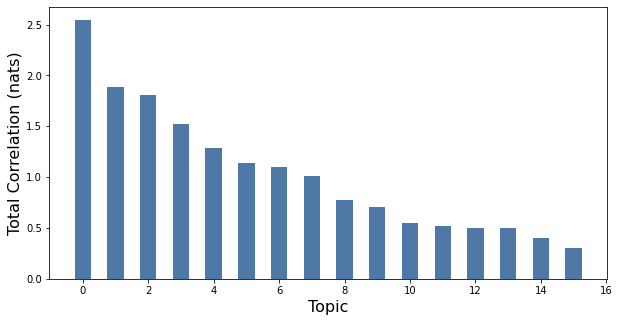

In [51]:

plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [56]:
anchored_topic_model = ct.Corex(n_hidden=len(anchors), seed=2)
anchored_topic_model.fit(doc_word, words=words,anchors= anchors, anchor_strength=6)

In [59]:

for n in range(len(anchors)):
    topic_words,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ','.join(topic_words))

0: room,shower,bathroom,beds,view,tv,day,bed,area,rooms
1: beach,leopard,girls,feeding,climb,visiting,visit,thanks,game,ice
2: breakfast,lunch,salmon,cheese,30am,cocktail,spray,board,laundry,chicken
3: food,menu,meat,snacks,pasta,vegetables,try,gin,conservation,evenings
4: bar,came,bath,taken,sliding,zulu,stocked,heard,information,bungalows
5: location,shopping,activity,bags,andbeyond,phinda,job,cats,number,blew
6: service,management,reception,childcare,arrange,type,phindas,suited,habitats,tours
7: know,said,end,kruger,point,evening,staying,hand,laid,time
8: wifi,air,flora,dishes,conditioning,sat,fences,order,example,learn
9: pool,deck,plunge,overlooking,privacy,forest,person,suite,bathrooms,suites
10: dinner,got,manager,felt,shop,talk,stayed,security,picked,excursion
11: terrace,value,knowledge,leave,drives,let,birds,monkeys,views,use
12: hotel,walked,bottles,encounters,communication,shown,paying,bag,growing,escort
13: family,cape,wife,cost,town,told,families,lodges,look,visits
14: as

# Rupture model

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt

In [75]:
def binseg(scores):
    # fast
    model = "l2"
    n_samples = scores.shape[0]
    algo = rpt.Binseg(model=model).fit(scores)
    try:
        my_bkps = algo.predict(n_bkps=5)
#         with open(stats, 'w') as file:
#             json.dump([my_bkps,n_samples ], file)
        # show results
        print(my_bkps, n_samples)

        rpt.show.display(scores, my_bkps, figsize=(10, 6))
        plt.title('Change Point Detection: Binary Segmentation Search Method')
#         plt.savefig(outputfile)
#         plt.close()
    except Exception:
        print(Exception)

[15, 40, 225, 415, 420, 456] 456


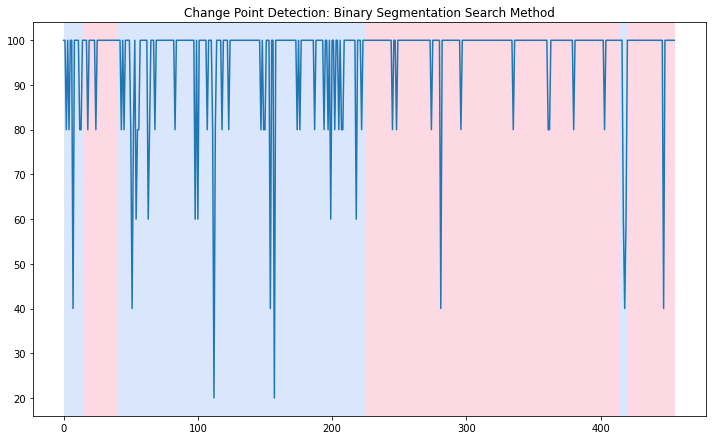

In [85]:
binseg(np.array(scores))

[15, 50, 55, 70, 230, 456] 456


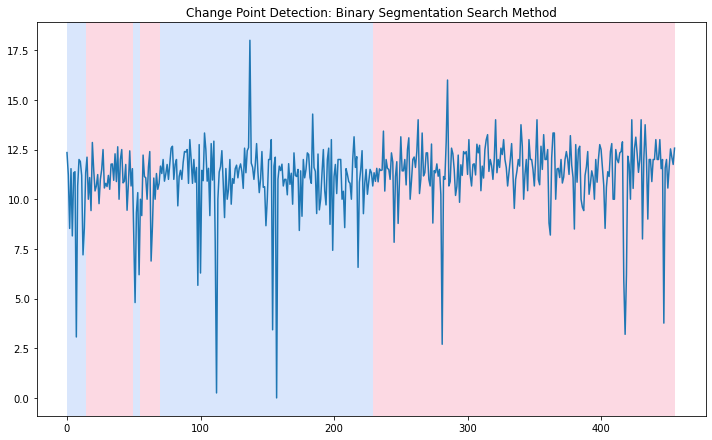

In [77]:
binseg(np.array(all_scores))

In [86]:
reviews[225:230]

[{'date': '2016-01-04 00:00:00',
  'score': 100.0,
  'rate_sent_score': 10.25,
  'review': ' A DREAM THAT BECOMES REALITY . Everything about this visit was perfect . The people , the view , the dinner . Everyday you fall into a new surprise that they have arranged for you . A bq in the bush . A private dinner in our lodge . . No more words than : A DREAM LOCATION !',
  'aspects': {'DREAM': 0,
   'BECOMES REALITY': 0,
   'Everything': 1,
   'visit': 1,
   'people': 0,
   'view': 0,
   'dinner': 0,
   'arranged': 0,
   'bq': 0,
   'lodge': 0,
   'words': -1,
   'DREAM LOCATION': 0}},
 {'date': '2016-01-13 00:00:00',
  'score': 100.0,
  'rate_sent_score': 10.875,
  'review': ' Memories for a lifetime . My husband , teen daughter , and I went on our first safari end of December and first of January . And Beyond planned our entire trip that included 2 nights at Phinda Mountain Lodge , 3 nights at Phinda Forest Lodge , and 5 nights in Cape Town . After 2 weeks , we did not want to leave , an

In [81]:
reviews[230:240]

[{'date': '2016-01-25 00:00:00',
  'score': 100.0,
  'rate_sent_score': 11.333333333333334,
  'review': ' Here I fell in love with Africa ! We spent 3 nights at Phinda Mountain Lodge and the days spent there were the highlights of our South Africa trip ! The accommodation is very comfortable and stylish , the rooms are spacious , great terrace and you really get the privacy they promise ! Thank you Desray for helping us organize this safari adventure , thank you Sibu ( our ranger ) and Tom ( our tracker ) for making sure we see all the animals and for making us feel safe even if lion king was 10meters away ! The views are phenomenal , the people are lovely and the food is fabulos ! You can not stop eating what Chef Neo prepares for the guests there ! I will definitely like to go back to Phinda mountain lodge and to its people !',
  'aspects': {'Africa': 1,
   'Mountain': 0,
   'accommodation': 1,
   'rooms': 1,
   'terrace': 1,
   'organize': 0,
   'Tom': 0,
   'views': 1,
   'people':